### NN

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier

Data Loading

In [171]:
sales = pd.read_csv('data/sales_n2.csv')
sales.head(3)

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,-0.577610,-0.403528,0.64,1,1.905318
1,-0.862635,0.113491,0.90,0,0.055760
2,-0.926765,-0.855920,0.61,1,1.071823


In [172]:
X = sales.iloc[:, [2, 4]].values
X

array([[ 0.64      ,  1.9053184 ],
       [ 0.9       ,  0.05575958],
       [ 0.61      ,  1.07182283],
       ...,
       [ 0.28      , -0.78860177],
       [ 0.26      ,  0.06741765],
       [ 0.22      , -0.05074766]])

In [173]:
y = sales.iloc[:, 3].values.reshape(-1, 1)
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Define epoch as 500, hidden units as 3, sigmoid as activiation function

In [175]:
model = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', learning_rate_init=0.1, max_iter=500)

In [176]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.62      0.81      0.70       117
           1       0.62      0.38      0.47        94

    accuracy                           0.62       211
   macro avg       0.62      0.60      0.59       211
weighted avg       0.62      0.62      0.60       211



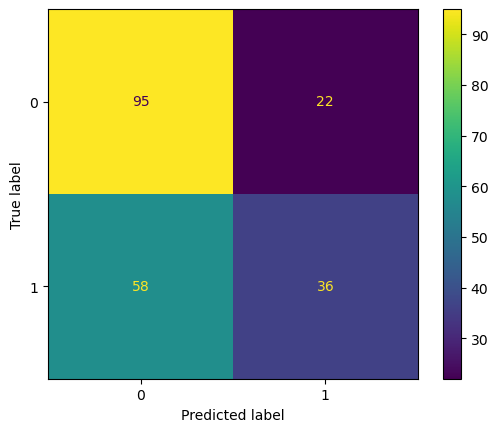

In [177]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
disp.plot()